Week 4: Multiple Linear Regression and Regression in Practice
=========

## **Notebook Overview**

This notebook is available on github
[here](https://github.com/Yushi-Y/AAS-ongoing-tutorials). If you find
errors or would like to suggest an improvement then let me know.

This week is all about applying regression in practice! Those of you who were not enjoying the heavy maths will be pleased that this is a far more practical session. You have 9 questions about running regression models but really it is one big question with many parts. Note that this is a really useful lesson for working out when a regression model might have some red flags. Try to realise why the 9 questions are linked.

### **Additional Resources**

1. **[General statsmodels documentation](https://www.statsmodels.org/dev/api.html):** A little bit about the documentation of statsmodels and why we import it in the way we do. You will need to know about the '.ols' extension of smf for this tutorial [(details here)](https://www.statsmodels.org/dev/generated/statsmodels.formula.api.ols.html). Information is available via the link. Note that there are lots of other valid ways to do regression in statsmodels and other libraries but this is quite a neat way. Also in the same style as R for those of you who have used it.

2. **[Unbelievably helpful statsmodels regression documentation](https://www.statsmodels.org/dev/example_formulas.html):** This shows how to write regression formula in this R-style. It has all of the different documentation for categorical variables, higher-order terms, interactions...etc. Really good resource.

3. **[Useful Ben Lambert Videos:](https://www.youtube.com/playlist?list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU)** There are quite a lot this week so I've listed them all below. Many of these are repeats from past notebooks or the content should have been covered in class anyway.

  **Level 1: Strongly recommend**
      * [Interpreting regression coefficients in MLR](https://www.youtube.com/watch?v=JwGaos2Y9bM&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=99&t=259s): Gold. A little bit mathematical but stick with it. Really important to know.
      * [Dummy Variables:](https://www.youtube.com/watch?v=s7EyQwJahgw&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=103) Nice. Good introduction to dummies/binary variables/dichotomous variables.
      * [Interactions:](https://www.youtube.com/watch?v=HyA_Vgbc0t4&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=105) Really good to watch if confused about interaction terms.
      * [$R^2$](https://www.youtube.com/watch?v=QQQz0qefj2c&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=71). There is a part 1, part 2 and a video about adjusted $R^2$. Part 1 is well worth a watch. Quite mathematica but you'll pick up the general idea. Part 2 might be more useful than part 1 as it is about the problems with using $R^2$ and why you mighjt want to consider adjusted $R^2$. Note that the problems with $R^2$ are really well known so if you fall into this trap, it'll be quite obvious to the examiner!

  **Level 2: Good to know**
      * [Dummies and Interactions:](https://www.youtube.com/watch?v=ScKL40dp8M4&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=104) A little more complex but still good. Adam covered this in class but might have been complex.
      * [Interpreting regression coefficients in log-transformed models](https://www.youtube.com/watch?v=aXBFKKh54Es&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=100&t=89s): Hint: MAY be useful for one the questions later... The video is pretty mathsy so many of you might not be able to follow it. BUT the conclusions and interpretation (i.e. the rule to follow) is not difficult so persist with it but don't get bogged down.

  **Level 3: If time**
      * [Multicollinearity](https://www.youtube.com/watch?v=O4jDva9B3fw&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=61): A more advanced topic. Useful to know about but I come onto it near the end if you have time.
      * [The population regression function:](https://www.youtube.com/watch?v=oFaoCzj3YUY&list=PLwJRxp3blEvZyQBTTOMFRP_TDaSdly3gU&index=30) What I bang on about in class i.e. using a model to estimate the population function. Notation is a bit different to what I use so don't get too confused by new notation.

4. **[Wooldridge Econometrics:](https://www.academia.edu/44467534/ECONOMETRICS_A_Modern_Approach) [Good resource for really understanding the mathematical theory in depth]**

5. **Fox Textbook:** **[Good resource for really understanding the mathematical theory in depth]**

As usual we will start by importing some useful libraries.

In [1]:
%config InlineBackend.figure_format = 'svg'
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import matplotlib as matplotlib
import os.path as path

In this notebook we will also use an additional module, `heatmap`, which
provides a function for drawing heatmaps of the correlations between columns of
a pandas dataframe. If you have downloaded this code from GitHub you should
already have the file, if you are using Colab, the following will download a
copy of into your session.

We're going to import a function called correlatoin_heatmap which we made in a python file.

In [2]:
if path.exists('heatmap.py'):
    from heatmap import correlation_heatmap
else:
    import requests
    heatmap_py_url = 'https://raw.githubusercontent.com/Yushi-Y/AAS-ongoing-tutorials/main/W4-Multiple_Linear_Regression/heatmap.py'
    req = requests.get(heatmap_py_url)
    with open('urlheatmap.py', 'w') as f:
        f.write(req.text)
    from urlheatmap import correlation_heatmap

The data in `data-auto.csv` is a popular dataset of car characteristics. In this
notebook we will be looking at the miles per gallon (MPG) achieved by these cars
based on some features of the cars and where/when they were produced. The
`origin` of origin of the car is encoded as an integer, (recall you can use the
`dtypes` method to see this). The representation of the data is clearer by
mapping it to a string describing the origin.

In [3]:
data_csv = 'data-auto.csv'
if not path.exists(data_csv):
    data_csv = 'https://raw.githubusercontent.com/Yushi-Y/AAS-ongoing-tutorials/main/W4-Multiple_Linear_Regression/data-auto.csv'
df = pd.read_csv(data_csv)

In [4]:
df.origin = df.origin.map({1: 'America', 2: 'Europe', 3: 'Japan'})

In [5]:
col_names = df.columns.to_list()
numeric_cols = col_names[0:7]

A heatmap of the correlations between the variables in the data is a good way to
get a feel for the data.

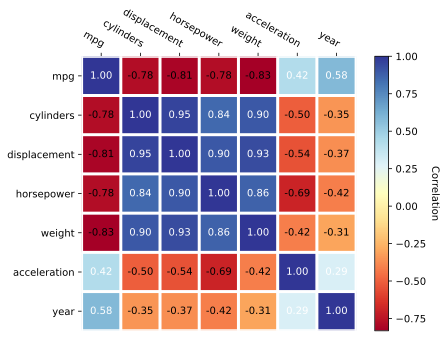

In [6]:
# use the imported function to visualize this.
correlation_heatmap(df[numeric_cols])
plt.show()

In [7]:
# We can also get a feel for the relationships by comparing the scatters.
plt.figure()
pd.plotting.scatter_matrix(df[numeric_cols], alpha = 0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

### Question 1

What do you notice about `cylinders`, `displacement`, `horsepower` and `weight`?
How do they relate to `mpg`?

### Answer

These variables are all highly correlated with each other and decreasing MPG; given what we know about cars this also makes sense from a mechanical perspective. They have a non-linear relationship with `mpg`.

### Question 2

What are the benefits of the heatmap? What are the benefits of the scatter? Why are the useful when viewed together? What important information cannot be deciphered by these?

### Answer

The heatmap is very pronounced and it is easy to see where the main correlations are. The scatter is far more detailed and shows us more complex relationships. The scatter gives us more information but it is harder to see the correlation so clearly. We cannot tell relationships between multiple variables with these, nor can we see causality!

### Question 3

Fit an ordinary linear regression for the MPG using all of the variables
(excluding the name of the car). Print a summary of the fitted model. Comment on
the results, how has the MPG changed over time? Save the fitted model as
`fit_1`, note the `1`, we are going to improve on this below.

Hint: See the statsmodels documentation in the resources section of the notebook

### Answer

In [9]:
# Write out the regression
form_1 = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + origin'

# Fit the model
fit_1 = smf.ols(formula = form_1, data = df).fit()

# Print the summary. Note that printing it looks better than just displaying it
print(fit_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          1.79e-139
Time:                        16:22:56   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          -17.9546      4.677  

### Question 4

Plot the residuals against the fitted values, what do you notice? Remember the definition of the resiudals from the lecture.

Hint: It relates to your fitted regression model.

Hint 2: It might be useful to first look up what the fitted value is, what the residual is and why we might want to plot them against each other.

### Answer

There is some clear non-linearity and the variance is not constant. We know this because the plot of the residuals has some structure to it. This shows us that there is information which we have no captured in our regression.

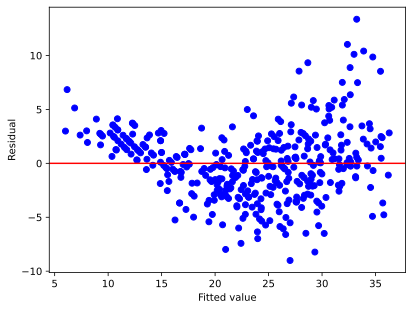

In [10]:
def make_fittedvalues_resid_plot(fit):
    plt.figure()
    plt.scatter(fit.fittedvalues, fit.resid, color='b')
    plt.axhline(y=0, color='r')
    plt.xlabel("Fitted value")
    plt.ylabel("Residual")
    return


make_fittedvalues_resid_plot(fit_1)
plt.show()

### Question 5

If we assume that this is a good model, what does the model tell us about fuel efficiency across the years? Hint: recall how to interpret regression coefficients.

**Keeping the attributes of a car constant**, each year, new cars get about `0.8` more miles per gallon **on average**. Note that the types of cars produced change over time, there is a trend for newer cars to be lighter, however this model fit still suggests there are improvements in efficiency beyond this.

### Question 6

Apply some transformations to reduce non-linearity in the relationship between the regressors and the response variable.

Hint: Look at the scatter plot to see where there might be non-linearities, then try to adjust the regressors so that the relationships are linear. Note that it might be helpful to adjust the variables and then plot the scatterplot again to see how the relationships have changed. Are they linear now?

Hint 2: It might be helpful to go back through the lecture notes and see what type of transformations can be applied.

### Answer

Looking at the scatter plots, we can see that the displacement, horsepower and weight all appear to have a non-linear relationship. To adjust for this we can log-transform these variables. See the Ben Lambert video on log-transformation if you are confused. Compare the two scatters and see that in the second the relationships are far more linear (appropriate for linear regression).


<Figure size 640x480 with 0 Axes>

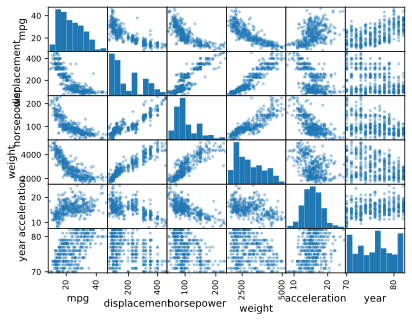

In [11]:
plt.figure()
pd.plotting.scatter_matrix(df[['mpg',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'year']], alpha = 0.4)
plt.show()

<Figure size 640x480 with 0 Axes>

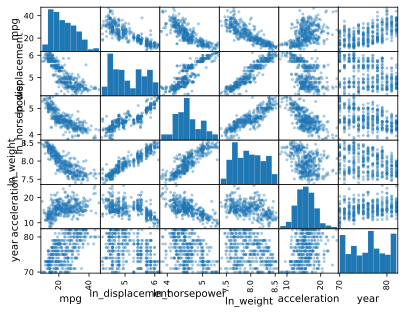

In [12]:
df['ln_weight'] = np.log(df.weight)
df['ln_horsepower'] = np.log(df.horsepower)
df['ln_displacement'] = np.log(df.displacement)

plt.figure()
pd.plotting.scatter_matrix(df[['mpg',
 'ln_displacement',
 'ln_horsepower',
 'ln_weight',
 'acceleration',
 'year']], alpha = 0.4)
plt.show()

### Question 7

Re-fit the model (as `fit_2`) with the transformed variables and comment on what
has changed with the model outputs. Also plot the residuals as you did before. Are there improvements?

### Answer

The log transformation of the variables has improved the fit. There is still some strong collinearity though. See the video on collinearity if you don't know what this is or why it is bad. The plot of the residuals is much more random so this is good.

In [13]:
form_2 = 'mpg ~ cylinders + ln_displacement + ln_horsepower + ln_weight + acceleration + year + origin'
fit_2 = smf.ols(formula = form_2, data = df).fit()
print(fit_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     268.4
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          7.16e-152
Time:                        16:26:54   Log-Likelihood:                -991.16
No. Observations:                 392   AIC:                             2000.
Df Residuals:                     383   BIC:                             2036.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          112.3638     10.114  

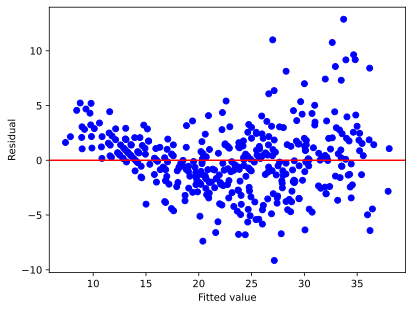

In [14]:
make_fittedvalues_resid_plot(fit_2)
plt.show()

### Question 8

Hint: The correct approach in the questions before was to log-transform some of the variables. Now, imagine that you called the log-transformed variables ln_variable_name, remove the `ln_displacement` variable and create a new model `fit_3`. Comment on how the model has changed. Again, consider a plot of the residuals.

### Answer
Removing `ln_displacement` has produced a more parsimonious model without reducing the model fit. $R^2$ is the same and adjusted $R^2$ has improved.

In [15]:
form_3 = 'mpg ~ cylinders + ln_horsepower + ln_weight + acceleration + year + origin'
fit_3 = smf.ols(formula = form_3, data = df).fit()
print(fit_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     307.3
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          4.43e-153
Time:                        16:28:02   Log-Likelihood:                -991.28
No. Observations:                 392   AIC:                             1999.
Df Residuals:                     384   BIC:                             2030.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept          113.8057      9.659  

### Question 9

In a new model, `fit_4`, include an interaction term between the origin of the
cars and their year or release. What does this tell you about car manufacturing
in the considered regions? As always, plot the residuals again.

Hint: How do you do interactions in statsmodels?

### Answer

We see that Europe and Japan are improving their efficiency faster than America. Note the $R^2$ is better and the residuals are more random. Lovely.

In [16]:
form_4 = form_3 + ' + origin * year'
fit_4 = smf.ols(formula = form_4, data = df).fit()
print(fit_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     252.1
Date:                Wed, 01 Nov 2023   Prob (F-statistic):          1.00e-154
Time:                        16:29:10   Log-Likelihood:                -981.48
No. Observations:                 392   AIC:                             1983.
Df Residuals:                     382   BIC:                             2023.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               128.27

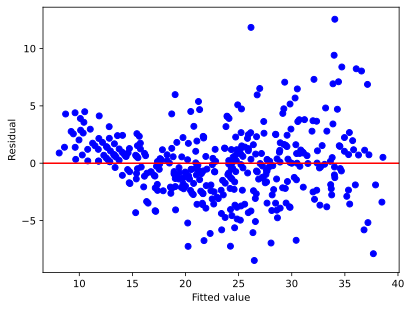

In [17]:
make_fittedvalues_resid_plot(fit_4)
plt.show()